# Моделирование выделенных полос

Эта рабочая тетрадь позволит пошагово выполнить моделирование транспортных потоков и анализ эффекта от ввода выделенных полос

## 1 Моделирование

### 1.1 Введение

[SUMO](https://eclipse.dev/sumo/) - это открытое ПО для транспортного микро-моделирования. Моделирование выполняется на уровне отдельных объектов (транспортных средств, пешеходов).

В рамках данного исследования выполнялось моделирование транспортных процессов на фрагменте сети УДС Корабельной стороны города Севастополя. Рассматриваемый фрагмент УДС включает в себя (полностью или частично) улицы:
- ул. Героев Севастополя
- ул. Брестская
- ул. Багрия
- ул. Розы Люксембург
- ул. Истомина
- ул. Горпищенко
- ул. Загорулько
- ул. Тоннельная
- ул. Адмирала Макарова

Целью исследования является оценка ...

Предметом исследования являются характеристики движения маршрутных транспортных средств (НГПТ) в разных условиях (в существующем положении и предлагаемом варианте - при условии оптимизации ОДД на перекрестке улиц Героев Севастополя и Брестской и внедрения выделенных полос на отдельных участках УДС). В результате исследования на основе сравнения характеристик движения НГПТ в существующем положении и в предлагаемом варианте будет сделан вывод об эффективности предлагаемой схемы ОДД.

### 1.2 Входные данные для модели

В простейшем виде модель SUMO состоит из модели транспортной сети и определения параметров транспортных потоков (или списка отдельных поездок).

Модель транспортной сети импортирована из OpenStreetMap и дополнена недостающими параметрами в соответствии с существующим положением. В частности в модель включены программы управления светофорными объектами соответствующие фактическим режимам светофорных объектов в рассматриваемые периоды времени (утренние часы-пик, 7:30-9:30). Для моделирования процессов в соответствии с предлагаемой схемой выделенных полос в базовую модель внесены соответствующие изменения, ограничивающие движение легковых ТС по полосам, выделенным для движения НГПТ.

Модель основных транспортных потоков выполнена на основе расчетной пропускной способности участков рассматриваемой транспортной сети и информации о загруженности участков из сервиса Яндекс.Карты (пробки и дорожная ситуация). Потоки маршутных транспортных средств рассчитаны на основе официальной информации о расписании маршрутов НГПТ Севастополя.

Так как предметом исследования являются характеристики движения НГПТ, то для построения модели транспортных потоков не выполнялся натурный подсчет фактических транспортных потоков, а транспортные потоки легковых транспортных средств назначались в соответствии с максимумами пропускной способности соответствующих участок УДС (с целью моделирования условий перегрузки, формирующихся на рассматриваемых участках УДС в часы-пик).

### 1.3 Выходные данные моделирования

Выходные данные моделирования представляют собой список смоделированных поездок каждого транспортного средства (от добавления на УДС в начале маршрута, до удаления из неё в конце).

Для анализа в рамках этого исследования используются следующие выходные данные:
- принадлежность ТС к транспортному потоку из соответствующего транспортного района
- время (момент) отправления ТС (момент добавления объекта в стартовую точку на УДС)
- время проезда по УДС (время от добавления на УДС в начале маршрута, до удаления из неё в конце)

In [1]:
# подключение программных библиотек
import sys
sys.path.append("../common")

import pandas as pd

from utils import run_process, get_stats

# базовое число для генератора случайных чисел, фиксируется между запусками для обеспечения
# воспроизводимости начальных условий в обоих моделях
seed = str(6235422)  # str(random.randint(1, 9999999))

### 1.4 Запуск моделирования

#### 1.4.1 Моделирование транспортных потоков в существующем положении (без выделенных полос)

На этом шаге откроется окно программы моделирования [SUMO](https://eclipse.dev/sumo/). Запуск модели и завершение работы произойдет автоматически. Необходимо дождаться завершения моделирования, чтобы необходимые выходные данные были сгенерированы.

In [4]:
_, _ = run_process(['sumo-gui', '-c', 'current/config.sumocfg', '--start', '--quit-on-end', '--seed', seed])

#### 1.4.2 Моделирование транспортных потоков в предлагаемом варианте (с выделенными полосами)

Аналогично выполняется запуск модели предлагаемого варианта.

In [5]:
_, _ = run_process(['sumo-gui', '-c', 'proposed/config.sumocfg', '--start', '--quit-on-end', '--seed', seed])

## 2 Анализ результатов

### 2.1 Построение графиков времени прохождения ТС по маршруту

In [2]:
df_current_model = get_stats('current/tripinfo-output.xml')
df_proposed_model = get_stats('proposed/tripinfo-output.xml')

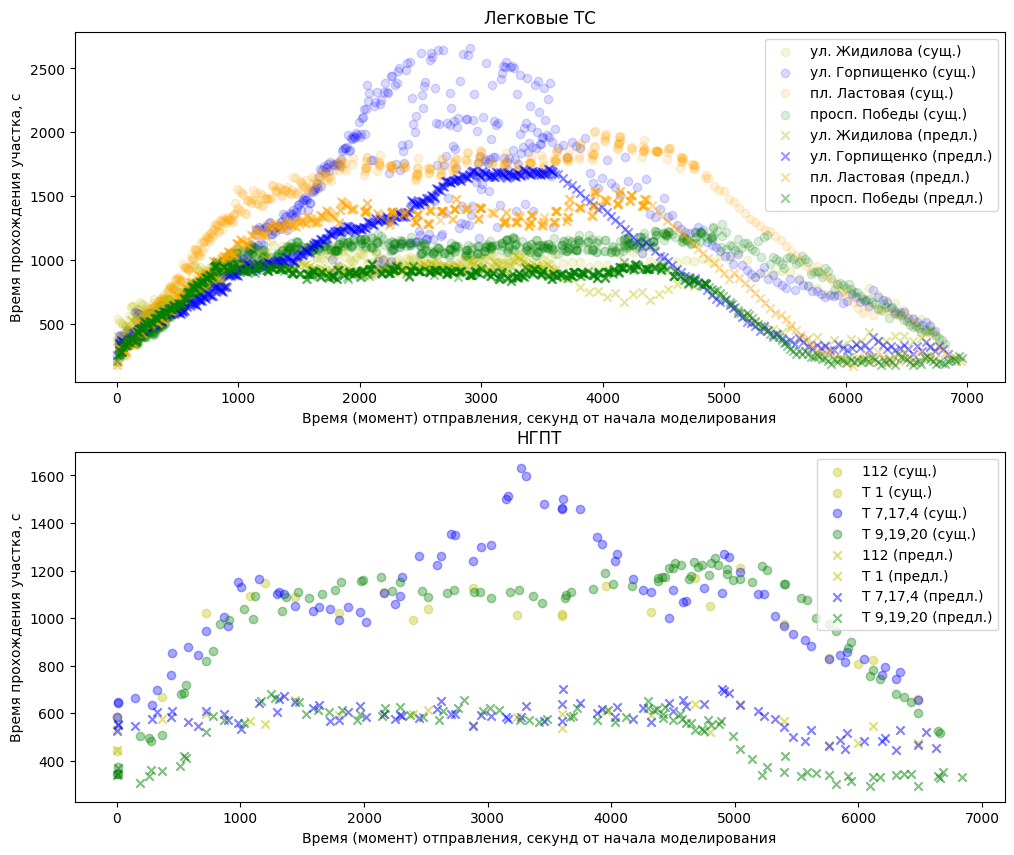

In [3]:
from plot_results import plot_results
import matplotlib

matplotlib.rcParams['figure.figsize'] = [12, 10]

plot_results({'current': df_current_model, 'proposed': df_proposed_model})

Каждая точка представляет собой время поездки одного моделируемого ТС. Точки разбиты по цветам и формам маркеров, цвета - соответствуют транспортным районам, из которых двигаются ТС (в случае НГПТ цвета так же соответсвуют номерам основных маршрутов в районе), а формы - типу модели (кружки - существующее положение, крестики - предлагаемое положение).

На верхнемм графике отображены данные по легковым ТС, на нижнем - НГПТ. Верхний график показывает, что даже при введении выделенных полос, задержки легковых автомобилей незначительно уменьшаются (маркеры в виде крестиков для каждого направления находятся преимущественно ниже кружков). Что важнее, нижний график показывает, что рост транспортных задержек НГПТ в моменты, когда в существующем положении они растут в два и более раз, в предлагаемом варианте растут не значительно и ограничены некоторой максимальной величиной независимо от загрузки других полос на УДС.

### 2.2 Расчет экономии времени в пути

Для расчета экономии времени в пути для каждого маршрутного ТС необходимо сопоставить поездки в результатах работы двух моделей и найти разницу времен поездки для модели существующего положения и модели предлагаемого варианта. Так как при запуске обеих моделей используется одинаковое базовое число для генератора случайных чисел, то моменты начала поездок ТС, принадлежащих одинаковым транспортным потокам, совпадают для двух моделей с точностью ±1 секунда.

In [4]:
ALL_PT_FLOWS = ["flow_01", "flow_02", "flow_11", "flow_12", "flow_13", "flow_31", "flow_32", "flow_33"]
current = df_current_model[df_current_model['flow'].isin(ALL_PT_FLOWS)]
proposed = df_proposed_model[df_proposed_model['flow'].isin(ALL_PT_FLOWS)]

merged = pd.merge(current, proposed, on="id", suffixes=("_c", "_p"))
filtered = merged[(merged['departTime_c'] >= 1200.0) & (merged['departTime_c'] <= 4800.0)]

time_improvement = filtered['travelTime_c'] - filtered['travelTime_p']

print("Средняя экономия времени в пути для одного маршрутного ТС составляет {:.0f} секунд = {:.2f} часов".format(
    time_improvement.mean(), time_improvement.mean() / 3600.0
))

Средняя экономия времени в пути для одного маршрутного ТС составляет 565 секунд = 0.16 часов


### 2.2 Расчет монетизированного эффекта экономии времени в пути

Рассчитаем монетизированного эффекта экономии времени в пути экономически активного населения при реализации инфраструктурного проекта в соответствии с Методикой оценки социально-экономических эффектов от проектов строительства (реконструкции) и эксплуатации объектов транспортной инфраструктуры (далее - Методика), утвержденной Постановлением правительства Российской Федерации от 26 ноября 2019 года N 1512.

Расчет выполняется для одного года, поэтому индекс _t_ в формуле опущен (исходные формулы приведены в пунктах 46-48 Методики). При расчете учитывается только экономия времени пассажирами и водителями общественного транспорта в утренние часы пик.

$${МЭ}_{ВРзан} = ({ВВ}_{ПАС} + {ВВ}_{ПЕР}) \times {ЗП}_{ср} \times {И}_{ипц} \times 12 / (247 \times 8) $$

$${ВВ}_{ПАС} = {КП}_{ПАС} \times {ЭВ}_{ТС} \times T_{ЭВпас}$$

$${ВВ}_{ПЕР} = {КП}_{ПЕР} \times {ЭВ}_{ТС} \times T_{ЭВпер}$$

Определим значения основных переменных на основе параметров и результатов моделирования.

$${ЭВ}_{ТС} = 0,16 \: \text{- по расчету (п. 2.2)}$$

Прогнозное количество пассажиров в час определим исходя из величины потока маршрутных транспортных средств каждого класса (по входным данным модели) и их пассажировместимости (для каждого класса подвижного состава примем следующие значения: _БК_ - 80, _СК_ - 40, _МК_ - 20):

$${КП}_{ПАС}^{1} = {N}_{БК} \times 80 + {N}_{СК} \times 40 + {N}_{МК} \times 20 = 48 \times 80 + 25 \times 40 + 31 \times 20 = 5460$$

Прогнозное количество персонала, осуществляющего эксплуатацию транспортных средств, также определим исходя из величины потока маршрутных транспортных средств:

$${КП}_{ПЕР}^1 = {N}_{БК} + {N}_{СК} + {N}_{МК} = 48 + 25 + 31 = 104 $$

Среднемесячная номинальная начисленная заработная плата работников в г.Севастополе в соответствии с данными Росстата за 2022г. составляет:

$$ {ЗП}_{ср} = 36\,467 \; \text{рублей}$$

По данным Росстата индекс потребительских цен в г.Севастополе за 2022 год составил:

$$ {И}_{ипц} = 112,13\,\%$$

Длительность пиковой загрузки УДС, при которой экономия времени в пути составляет величину, равную расчетной по результатам моделировани, примем за 2 часа, тогда

$$ {КП}_{ПАС} = {КП}_{ПАС}^{1} \times 2 = 5460 \times 2 = 10920 $$

$$ {КП}_{ПЕР} = {КП}_{ПЕР}^1 \times 2 = 104 \times 2 = 208 $$

$$ {ВВ}_{ПАС} = 10920 \times 0,16 \times 0,45 = 786,24 $$

$$ {ВВ}_{ПЕР} = 208 \times 0,16 \times 1 = 33,28 $$

Константы коэффициентов использования экономии времени для осуществления экономической деятельности пассажирами и персоналом определены Методикой и составляют соответственно:

$$ {T_{ЭВпас} = 0,45} \: \text{и} \: {T_{ЭВпер} = 1} $$

Значения всех переменных определены, монетизированный эффект экономии времени в пути составляет:

$${МЭ}_{ВРзан} = (786,24 + 33,28) \times 36467 \times 112,13 \times 12 / (247 \times 8) = 20\,350\,529\;\text{рублей} $$

Как было сказано ранее, расчет монетизированного эффекта выполнялся только с учетом экономии времени в пути пассажирами и водителями общественного транспорта в утренние часы пик, но также по результату моделирования был сделан вывод, что при введении выделенных полос время в пути сокращается и для легковых автомобилей, поэтому монетизированный эффект может быть еще больше. Эти вычисления опускаются по причине отсутствия точных входных данных о фактических транспортных потоках легковых транспортных средств.

In [ ]:
# df_proposed_model[df_proposed_model['flow'] == 'flow_11']